# ***深度卷积模型***

# 1. 概述

① 本文将主要介绍几个典型的CNN案例。

② 通过对具体CNN模型及案例的研究，来帮助我们理解知识并训练实际的模型。

③ 典型的CNN模型包括：
 - LeNet-5
 - AlexNet
 - VGG
 
④ 除了这些性能良好的CNN模型之外，我们还会介绍Residual Network（ResNet）。其特点是可以构建很深很深的神经网络（目前最深的好像有152层）。

⑤ 另外，还会介绍Inception Neural Network。接下来，我们将一一讲解。

# 2. LeNet-5

① LeNet-5模型是Yann LeCun教授于1998年提出来的，它是第一个成功应用于数字识别问题的卷积神经网络。

② 在MNIST数据中，它的准确率达到大约99.2%。典型的LeNet-5结构包含CONV layer，POOL layer和FC layer，顺序一般是CONV layer->POOL layer->CONV layer->POOL layer->FC layer->FC layer->OUTPUT layer，即y^。

① 下图所示的是一个数字识别的LeNet-5的模型结构：

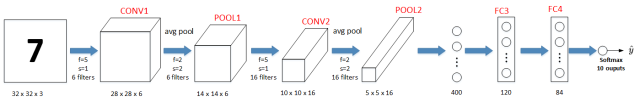

② 该LeNet模型总共包含了大约6万个参数。值得一提的是，当时Yann LeCun提出的LeNet-5模型池化层使用的是average pool，而且各层激活函数一般是Sigmoid和tanh。

③ 现在，我们可以根据需要，做出改进，使用max pool和激活函数ReLU。

# 3. AlexNet

① AlexNet模型是由Alex Krizhevsky、Ilya Sutskever和Geoffrey Hinton共同提出的，其结构如下所示：

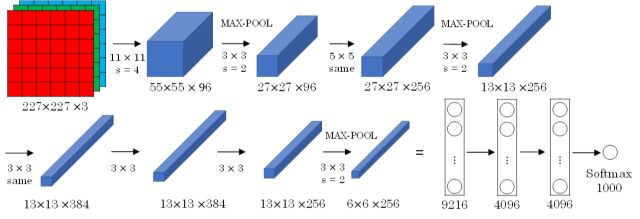

② AlexNet模型与LeNet-5模型类似，只是要复杂一些，总共包含了大约6千万个参数。

③ 同样可以根据实际情况使用激活函数ReLU。

④ 原作者还提到了一种优化技巧，叫做Local Response Normalization(LRN)。 而在实际应用中，LRN的效果并不突出。

# 4. VGG-16

① VGG-16模型更加复杂一些，一般情况下，其CONV layer和POOL layer设置如下：
 - CONV = 3x3 filters, s = 1, same
 - MAX-POOL = 2x2, s = 2
 
② VGG-16结构如下所示：

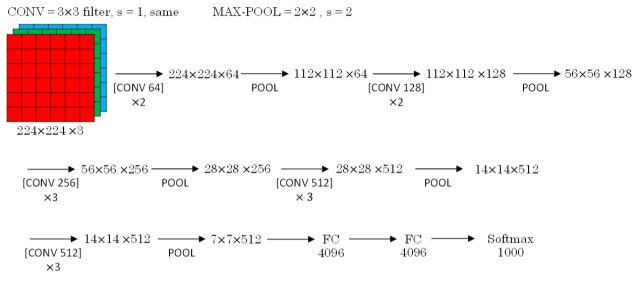

③ VGG-16的参数多达1亿3千万。

# 5. ResNets

① 我们知道，如果神经网络层数越多，网络越深，源于梯度消失和梯度爆炸的影响，整个模型难以训练成功。

② 解决的方法之一是人为地让神经网络某些层跳过下一层神经元的连接，隔层相连，弱化每层之间的强联系。这种神经网络被称为Residual Networks(ResNets)。

③ Residual Networks由许多隔层相连的神经元子模块组成，我们称之为Residual block。单个Residual block的结构如下图所示：

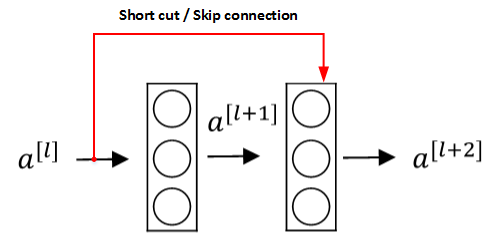

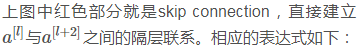

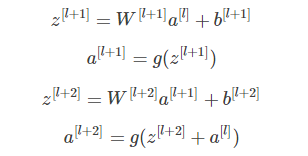

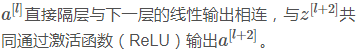

④ 该模型由Kaiming He, Xiangyu Zhang, Shaoqing Ren和Jian Sun共同提出。由多个Residual block组成的神经网络就是Residual Network。

⑤ 实验表明，这种模型结构对于训练非常深的神经网络，效果很好。

⑥ 另外，为了便于区分，我们把非Residual Networks称为Plain Network。

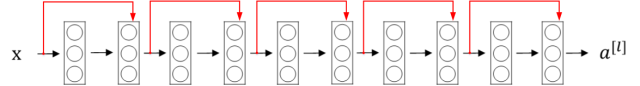

⑦ Residual Network的结构如上图所示。

⑧ 与Plain Network相比，Residual Network能够训练更深层的神经网络，有效避免发生发生梯度消失和梯度爆炸。

⑨ 从下面两张图的对比中可以看出，随着神经网络层数增加，Plain Network实际性能会变差，training error甚至会变大。然而，Residual Network的训练效果却很好，training error一直呈下降趋势。

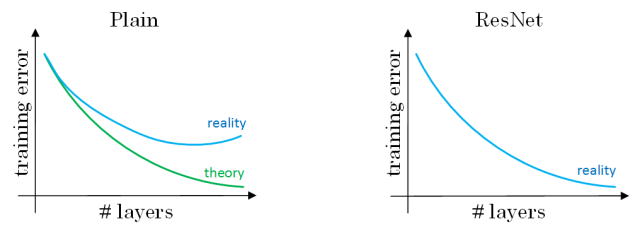

① 下面用个例子来解释为什么ResNets能够训练更深层的神经网络。

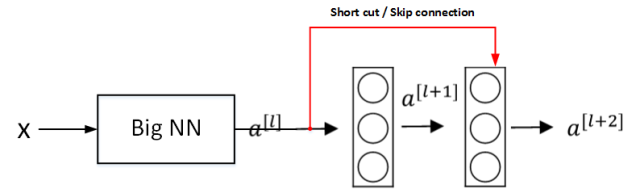

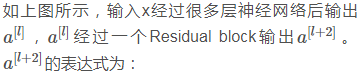

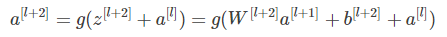

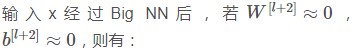

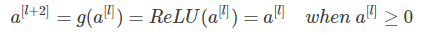

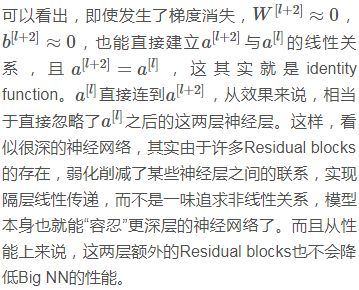

② 当然，如果Residual blocks确实能训练得到非线性关系，那么也会忽略short cut，跟Plain Network起到同样的效果。

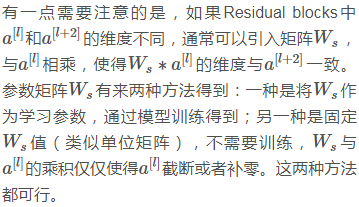

③ 下图所示的是CNN中ResNets的结构：

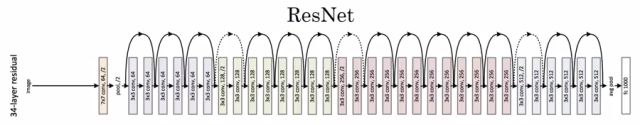

④ ResNets同类型层之间，例如CONV layers，大多使用same类型，保持维度相同。如果是不同类型层之间的连接，例如CONV layer与POOL layer之间，如果维度不同，则引入矩阵Ws。

# 6. 1x1 卷积

① Min Lin, Qiang Chen等人提出了一种新的CNN结构，即1x1 Convolutions，也称Networks in Networks。

② 这种结构的特点是滤波器算子filter的维度为1x1。

③ 对于单个filter，1x1的维度，意味着卷积操作等同于乘积操作。

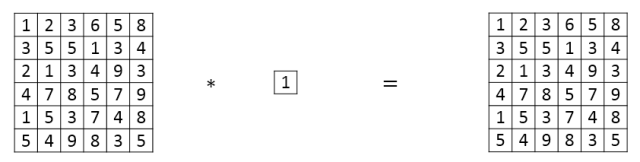

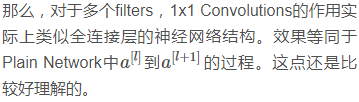

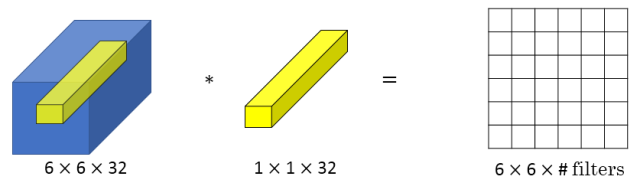

④ 1x1 Convolutions可以用来缩减输入图片的通道数目。方法如下图所示：

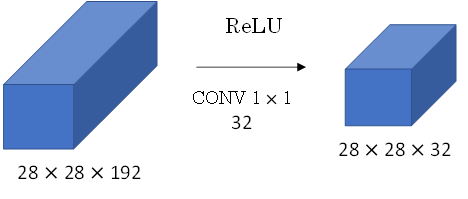

# 7. Inception

① 之前我们介绍的CNN单层的滤波算子filter尺寸是固定的，1x1或者3x3等。

② 而Inception Network在单层网络上可以使用多个不同尺寸的filters，进行same convolutions，把各filter下得到的输出拼接起来。

③ 除此之外，还可以将CONV layer与POOL layer混合，同时实现各种效果。但是要注意使用same pool。

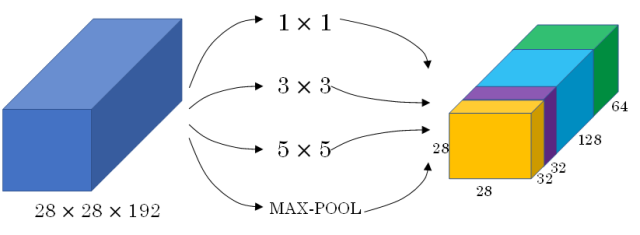

① Inception Network由Christian Szegedy, Wei Liu等人提出。与其它只选择单一尺寸和功能的filter不同，Inception Network使用不同尺寸的filters并将CONV和POOL混合起来，将所有功能输出组合拼接，再由神经网络本身去学习参数并选择最好的模块。

② Inception Network在提升性能的同时，会带来计算量大的问题。例如下面这个例子：

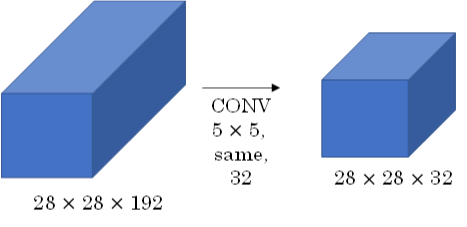

③ 此CONV layer需要的计算量为：28x28x32x5x5x192=120m，其中m表示百万单位。可以看出但这一层的计算量都是很大的。为此，我们可以引入1x1 Convolutions来减少其计算量，结构如下图所示：

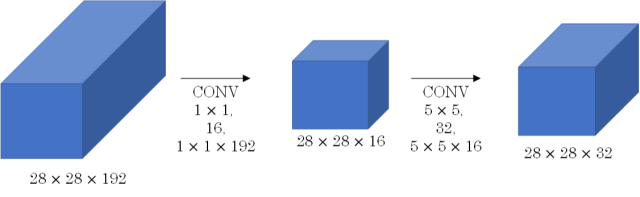

① 通常我们把该1x1 Convolution称为“瓶颈层”（bottleneck layer）。

② 引入bottleneck layer之后，总共需要的计算量为：28x28x16x192+28x28x32x5x5x16=12.4m。

③ 明显地，虽然多引入了1x1 Convolution层，但是总共的计算量减少了近90%，效果还是非常明显的。

④ 由此可见，1x1 Convolutions还可以有效减少CONV layer的计算量。

① 引入1x1 Convolution后的Inception module如下图所示：

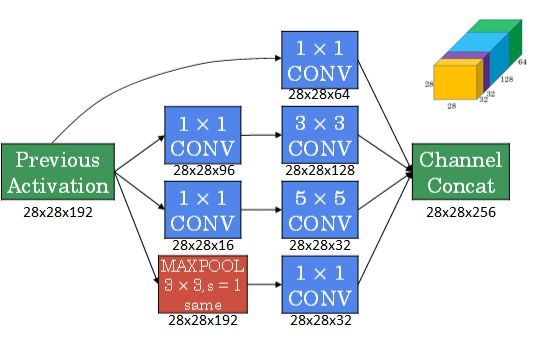

② 多个Inception modules组成Inception Network，效果如下图所示：

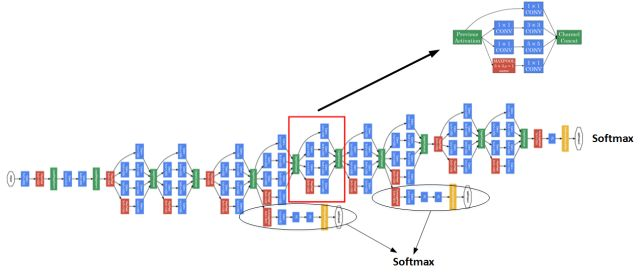

③ 上述Inception Network除了由许多Inception modules组成之外，值得一提的是网络中间隐藏层也可以作为输出层Softmax，有利于防止发生过拟合。

# 8. 数据增强

① 常用的Data Augmentation方法是对已有的样本集进行Mirroring和Random Cropping。

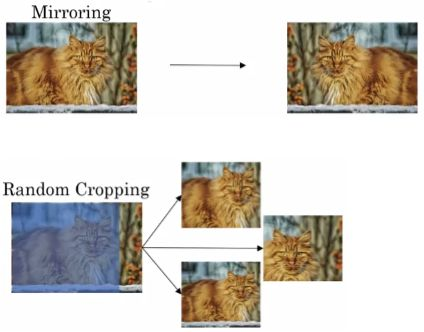

② 另一种Data Augmentation的方法是color shifting。color shifting就是对图片的RGB通道数值进行随意增加或者减少，改变图片色调。

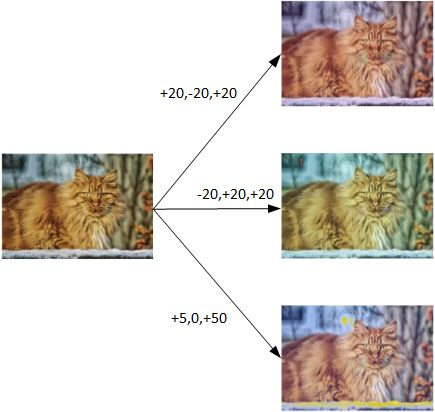

③ 除了随意改变RGB通道数值外，还可以更有针对性地对图片的RGB通道进行PCA color augmentation，也就是对图片颜色进行主成分分析，对主要的通道颜色进行增加或减少，可以采用高斯扰动做法。这样也能增加有效的样本数量。具体的PCA color augmentation做法可以查阅AlexNet的相关论文。

④ 最后提一下，在构建大型神经网络的时候，data augmentation和training可以由两个不同的线程来进行。

# 9. 机器视觉现状

① 神经网络需要数据，不同的网络模型所需的数据量是不同的。

② Object dection，Image recognition，Speech recognition所需的数据量依次增加。

③ 一般来说，如果data较少，那么就需要更多的hand-engineering，对已有data进行处理，比如上一节介绍的data augmentation。模型算法也会相对要复杂一些。

④ 如果data很多，可以构建深层神经网络，不需要太多的hand-engineering，模型算法也就相对简单一些。

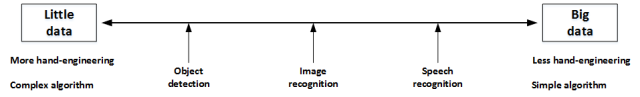

⑤ 值得一提的是hand-engineering是一项非常重要也比较困难的工作。

⑥ 很多时候，hand-engineering对模型训练效果影响很大，特别是在数据量不多的情况下。

⑦ 在模型研究或者竞赛方面，有一些方法能够有助于提升神经网络模型的性能：
 - Ensembling: Train several networks independently and average their outputs.
 - Multi-crop at test time: Run classifier on multiple versions of test images and average results.

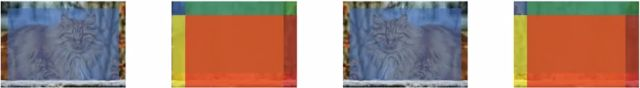

⑧ 但是由于这两种方法计算成本较大，一般不适用于实际项目开发。

⑨ 最后，我们还要灵活使用开源代码：
- Use archittectures of networks published in the literature
- Use open source implementations if possible
- Use pretrained models and fine-tune on your dataset